In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import randint

In [3]:
pd.set_option("display.max_columns", None)

# Introduction

Customer Churn also known as customer attrition, is the loss of clients or customers. Subscription based service companies like Telecommunication companies often use churn as an important business metric because the cost of retaining an existing customer is far less costly than acquiring a new one. That’s why companies usually make the distinction between voluntary and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service providers while involuntary churn occurs due to circumstances such as a customer’s allocation to a distant location. This report demonstrates a churn analysis and models using data from a Telco company containing customer information and their churning identity. The analysis is done using Python language in order to identify variables associated with customer churn.
  
## Objectives  
This report focuses on voluntary churn which occurs due to the company-customer relationship, depending on the factors the company can control. It aims to study customers' patterns through exploratory data analysis and applies predictive analytics techniques to create Churn Predictive Modelings to determine customers who are likely to churn. Lastly, the study will conclude which model is the best perfomer in detecting churn customers by looking at the recall score.


## Data Overview

The dataset contains the information regarding the Telco customer and its services. Each row represents a unique customer and each column shows the services that customers use. The column “Churn” indicates whether the customer left the company or not within the last month. 
	
    There are a total of 7043 customers in the dataset. 
- Customers who left within the last month – the column is called Churn
- Demographic info about customers – gender, age range, and if they have partners and dependents
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


In [4]:
telco = pd.read_csv("telco_customer_churn.csv")

telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cleaning Data
### Missing values

In [16]:
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
telco[telco['TotalCharges'].isnull()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [18]:
telco[telco['tenure'] == 1].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes


In [19]:
telco[telco['tenure'] == 5].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
36,6047-YHPVI,Male,0,No,No,5,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.70,316.90,Yes
97,0278-YXOOG,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes


It showed that those who pay month-to-month have been recorded, but those who have one and two years contract and haven't been with the company for one month weren't not recorded. Therefore, it can be said that the total charges of the clients didn't have any data because they haven't been with the company for one month yet. 

In this case, I decided to drop the 11 rows since the number of rows with NaN values are very small, and taking into consideration that all of them are churn=”NO”, which is over-represented in the data, it doesn't affect much to the dataset. 

In [20]:
# dropping missing value 
telco = telco.dropna()
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Exploratory Data Analysis

In [21]:
from pandas_profiling import ProfileReport


profile = ProfileReport(telco, title='Telco Profiling Report', explorative=True)

profile.to_widgets()

/Users/macbook/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/visualisation/plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


## Visualizing the distribution of 'tenure', 'MonthlyCharges', 'TotalCharges'

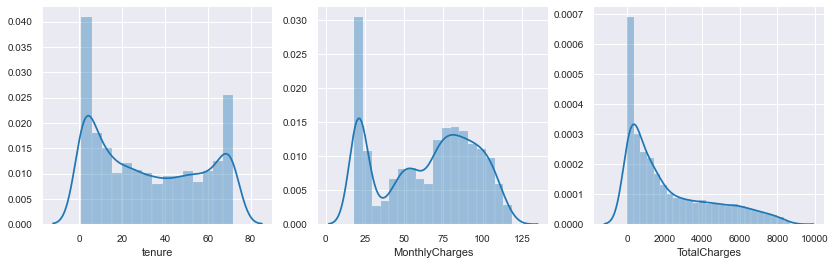

In [22]:
sns.set_style("darkgrid")

f, axes = plt.subplots(1, 3, figsize=(14, 4))

# Visualize the distribution of 'tenure', 'MonthlyCharges', 'TotalCharges'
sns.distplot(telco['tenure'], ax=axes[0])

sns.distplot(telco['MonthlyCharges'], ax=axes[1])

sns.distplot(telco['TotalCharges'], ax=axes[2])

plt.show()

From the three graphs, only MonthlyCharges that is quite distributed while tenure are not really distribute, and TotalCharges has left skewd. Also, if looking at the mean and standard deviation of three numerical data, TotalCharges has too high mean and standard deviation. Thus, I will use normilize the data later in the Preprocessing step. 

In [23]:
# change the type of Senior Citizen to not confuse with Numerical data
telco['SeniorCitizen'] = telco['SeniorCitizen'].astype("category")

In [24]:
telco.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


# Preprocessing for Churn Modeling
## Data Preprocessing

In [25]:
# Store customerID and Churn column names
custid = ['customerID']
target = ['Churn']

# Store categorical column names
categorical = telco.nunique()[telco.nunique() < 5].keys().tolist()

# Remove target from the list of categorical variables
categorical.remove(target[0])

# Store numerical column names
numerical = [x for x in telco.columns if x not in custid + target + categorical]

### One-Hot Encoding (Dummy Variables)

I apply one-hot encoding to the categorical datas and use <code>drop_first=True</code> to drop unneeded dummy variables, except <code>'Churn'</code> that is replace by <code>'No' with 0 and 'Yes' with 1</code>. 

I also drop <code>'customerID'</code> as the unique identifier doesn't provide any necessary information.

In [26]:
# Perform one-hot encoding to categorical variables 
telco = pd.get_dummies(data = telco, columns = categorical, drop_first=True)

# Replace 'no' with 0 and 'yes' with 1 in 'Churn'
telco['Churn'] = telco['Churn'].replace({'No':0,'Yes':1})

telco = telco.drop('customerID', axis=1)

telco.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


## Feature Selection

### Correlation Metrix with Heatmap

In general, it's a good ideas to reduce the number of features to only the most useful ones, and discard the rest. Here, I first visualize all the features correlation using heatmap and then drop the features that are highly correlated.

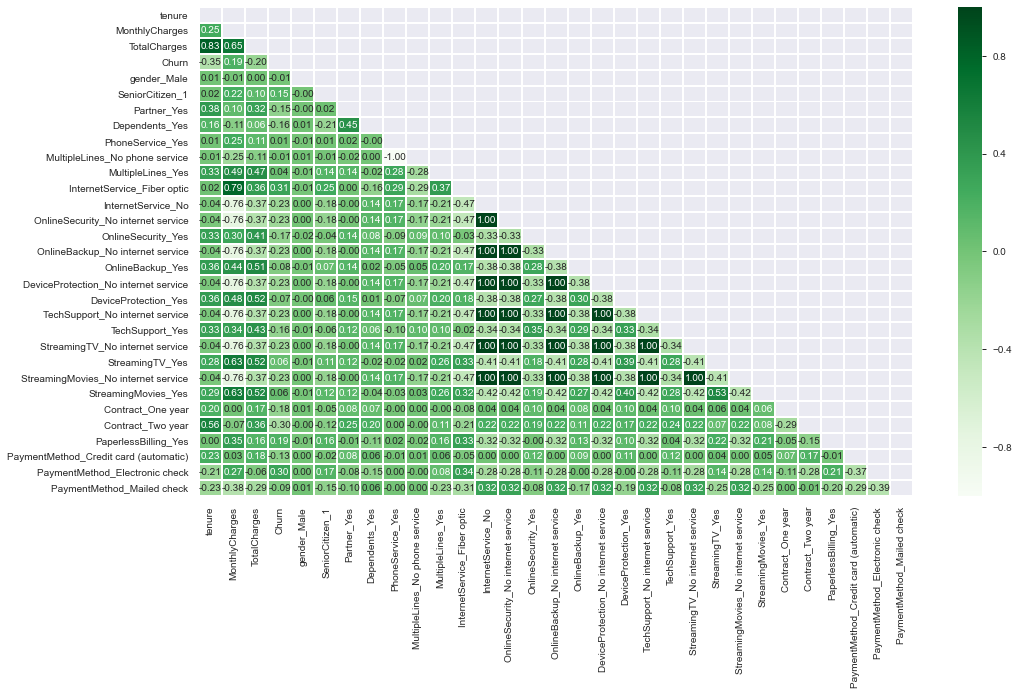

In [27]:
plt.figure(figsize=(16,9))

corr_matrix = telco.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
sns.heatmap(corr_matrix, mask=mask, cmap='Greens',center=0, linewidths=1,annot=True, fmt=".2f")

plt.show()

In the Telco Dataset, it can be seen that <code>TotalCharges, OnlineBackup_No internet service, DeviceProtection_No internet service, TechSupport_No internet service, StreamingTV_No internet service, StreamingMovies_No internet service</code> are highly correlated with features like MonthlyCharges, Internet_Service_No and other features respectively. 

### Dropping Correlated Features

From a modeling perspective, we can improve the performance of our models by removing these redundant features because features that are highly correlated with other features provide no additional information to the model.

In [28]:
telco = telco.drop(['TotalCharges','OnlineBackup_No internet service','DeviceProtection_No internet service',
                         'TechSupport_No internet service','StreamingTV_No internet service',
                         'StreamingMovies_No internet service'], axis=1)
telco.shape

(7032, 25)

### Visualizing Feature Importances

I check out the top 12 most important features in the Telco dataset using ExtraTreeClassifier and then I will use the function Model-Based Feature Selection from Random Forest to reduce feaures to half. 

In [29]:
# Create feature variable
X = telco.drop('Churn', axis=1)

# Create target variable
y = telco['Churn']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

[0.21669023 0.19783977 0.04144491 0.02848396 0.03142122 0.02523363
 0.0045372  0.00492239 0.02673028 0.04797913 0.01419772 0.0115549
 0.03049395 0.02810271 0.02766817 0.03101722 0.02395514 0.02467909
 0.03425146 0.04345786 0.03245536 0.01835717 0.03984539 0.01468114]


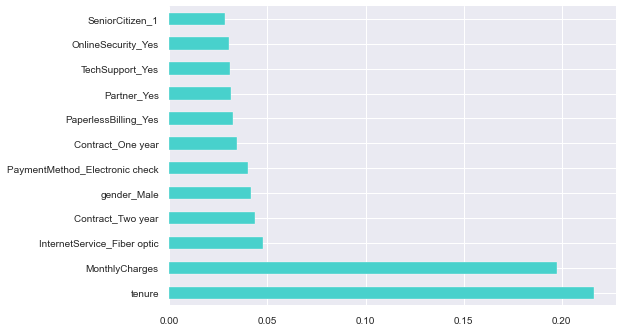

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh', color='mediumturquoise')

plt.show()

### Model-Based Feature Selection with Random Forest

Model-based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. The SelectFromModel selects all the important features, and I use the median as threshold, which only half of the features will be selected. Also, I use a random forest classifier with 100 trees to compute the feature importances which is a quite complex model 

In [31]:
select = SelectFromModel(
            RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

# fit to the model
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train) 

print("X_train.shape: {}".format(X_train.shape)) 
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train = X_train_l1
X_test = select.transform(X_test)

X_train.shape: (5625, 24)
X_train_l1.shape: (5625, 12)


**After fitting and reducing the features, we can see that half of the features are droppped.**

In [32]:
telco_df = telco.copy()

### Feature Scaling

As most models require the data to be on the same scale, and as seem in the previous step, one of the three numerical columns, TotalCharges has standard deviation as high as 2266. Therefore, I will rescale the data using Standard Scaler, which centers the distribution around the mean of your data and calculates the number of standard deviations away from the mean each point is.

Besides to avoid data leakage, I only apply Standard Scaler on the training data. 

In [33]:
# Initialize StandardScaler instance
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Before scaling, the mean:{} and standard deviation:{}".format(round(np.mean(X),2)
                                                                     ,round(np.std(X),2)))

print("After scaling, the mean:{} and standard deviation:{}".format(round(np.mean(X_train),2)
                                                                    , round(np.std(X_train),2)))


Before scaling, the mean:tenure                                   32.42
MonthlyCharges                           64.80
gender_Male                               0.50
SeniorCitizen_1                           0.16
Partner_Yes                               0.48
Dependents_Yes                            0.30
PhoneService_Yes                          0.90
MultipleLines_No phone service            0.10
MultipleLines_Yes                         0.42
InternetService_Fiber optic               0.44
InternetService_No                        0.22
OnlineSecurity_No internet service        0.22
OnlineSecurity_Yes                        0.29
OnlineBackup_Yes                          0.34
DeviceProtection_Yes                      0.34
TechSupport_Yes                           0.29
StreamingTV_Yes                           0.38
StreamingMovies_Yes                       0.39
Contract_One year                         0.21
Contract_Two year                         0.24
PaperlessBilling_Yes               

# Models
## Baseline Models
### Logistic Regression

In [34]:
# Instantiate the classifier
logreg = LogisticRegression()

# Fit the classifier
logreg.fit(X_train, y_train)

# Predict the label of new_customer
y_pred = logreg.predict(X_test)

print("Training set score: {:.2f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Training set score: 0.80
Test set score: 0.79


In here, the model predicted 79% correctly on the testing dataset and have similar accuracy as the training data. It also customers that churn, but are classified as  not churn are 201.

In [35]:
# Measure model performance on testing data
logreg_accuracy = round(accuracy_score(y_test, y_pred),3)

In [36]:
# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[943  88]
 [201 175]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1031
           1       0.67      0.47      0.55       376

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



For the Telco dataset, it is a classification problems as we try to predict Churn and Not Churn, thus, Logistic Regression is a good baseline model to begin with. It offers simplicity and interpretability. However, it is not flexible enough to capture more complex relationships in your dataset, so it the next step, we will explore Knn, Random Forests, and Decision Tree because they have high performance but offer limited interpretability.

### k-Nearest Neighbors

In [37]:
# Instantiate the classifier
knn = KNeighborsClassifier()

# Fit the classifier
knn.fit(X_train, y_train)

# Predict the label of new_customer
y_pred = knn.predict(X_test)

# training accuracy
print("Training set score: {:.3f}".format(knn.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Training set score: 0.845
Test set score: 0.78


In [38]:
# Measure model performance on testing data
knn_accuracy = round(accuracy_score(y_test, y_pred),3)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[916 115]
 [201 175]]


KNeighborsClassifier is also a good baseline model as it is easy to understand. The default for n_neighbor is 5, and the model is about 78% accurate, meaning the model predicted the class correctly for 78% of the samples in the test dataset. Although it predicted 85% accurately for the training dataset, it doesn't perform well on the unseen data like Logistic Regression.


### Random Forest

In [39]:
# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

print("Training set score: {:.3f}".format(clf.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))

Training set score: 0.997
Test set score: 0.78


In [40]:
# Measure model performance on testing data
clf_accuracy = round(accuracy_score(y_test, y_pred),3)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[922 109]
 [198 178]]


The Random Forest performs really well on the training dataset which its accuracy is almost 100%. However, when performing on the unseen data, it drops to 78%. It has lower False Negative than Knn and Logistic Regression, but still lower than Decision Tree.

### Decision Tree

In [41]:
# Instantiate the classifier
mytree = DecisionTreeClassifier()

# Fit the classifier
#clf.fit(telco[features], telco['Churn'])
treemodel = mytree.fit(X_train, y_train)

# Predict the label of new_customer
y_pred = treemodel.predict(X_test)

print("Training set score: {:.3f}".format(mytree.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(mytree.score(X_test, y_test)))

Training set score: 0.997
Test set score: 0.73


In [42]:
# Measure model performance on testing data
mytree_accuracy = round(accuracy_score(y_test, y_pred),3)

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[836 195]
 [185 191]]


The Decision Tree model also perfrom really well on the training dataset, which is almost 100% accuracy, however, it doesn't perfrom good on the testing dataset. It is notable that it has low False Negative than any other models.

### Comparing Model Performance

In [43]:
# Compare servaral models according to their accuracies
model_comparision = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'k-Nearest Neighbors'],
    'Accuracy Score' : [logreg_accuracy, mytree_accuracy, clf_accuracy, knn_accuracy]
})

Model_Comparision = model_comparision.sort_values(by='Accuracy Score', ascending=False)
Model_Comparision = Model_Comparision.set_index("Model")
Model_Comparision.reset_index()

,Model,Accuracy Score
0,Logistic Regression,0.795
1,Random Forest,0.782
2,k-Nearest Neighbors,0.775
3,Decision Tree,0.730


All of the models perform quite well, especially Logistic Regression, follow by Random Forest, K-Nearest Neigbors with accuracy almost 80%. Only Decision Tree has the lowest accuracy score. In this case, we're going to explore Logistic Regression more with 5 folds cross validation to test its perfomance with different splits.


# Model Tuning
## Tuning the three models

In [44]:
telco_df = telco_df[['tenure', 'MonthlyCharges','InternetService_Fiber optic',
            'PaymentMethod_Electronic check','gender_Male','Contract_Two year',
           'Contract_One year', 'PaperlessBilling_Yes','Partner_Yes',
           'OnlineSecurity_Yes','OnlineBackup_Yes','TechSupport_Yes',
            'Churn']]

telco_df.shape

(7032, 13)

In [45]:
# Create feature variable
X = telco_df.drop('Churn', axis=1).values

# Create target variable
y = telco_df['Churn'].values

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

### Cross-Validation (5 folds) 

In [46]:
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LogisticRegression(solver = 'newton-cg')

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {:.3f}".format(np.mean(cv_scores)))

[0.80028429 0.80099502 0.7859175  0.8029872  0.79587482]
Average 5-Fold CV Score: 0.797


Using 5-fold CV, the Logistic Regression model increases its score a bit from 0.795 to 0.797, which is not so much different. 

### Scaling and CV in a Pipeline 
#### Logistic Regression

In [47]:
from sklearn.pipeline import make_pipeline

# initiate Pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression())

# Setup the hyperparameter grid
param_grid = {'logisticregression__C': [0.1, 1, 10, 100]}

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(pipe, param_grid, cv=5) 

# Fit it to the data
logreg_cv.fit(X_train, y_train)

y_pred = logreg_cv.predict(X_test)

logreg_best_score = logreg_cv.best_score_

print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Test-set score: {:.3f}".format(logreg_cv.score(X_test, y_test)))
print("Best score is {:.3f}".format(logreg_best_score))

Tuned Logistic Regression Parameters: {'logisticregression__C': 0.1}
Test-set score: 0.798
Best score is 0.797


To tune the model to a better hyperparamter, I apply pipepline to scale the training data and then on the test data. In combination with GridSearchCV, the best parameter for C is 0.1, which is a small value, but provide better accuracy on the test score. Also, the false negative in this model has high number than the Logistic Regression baseline model.

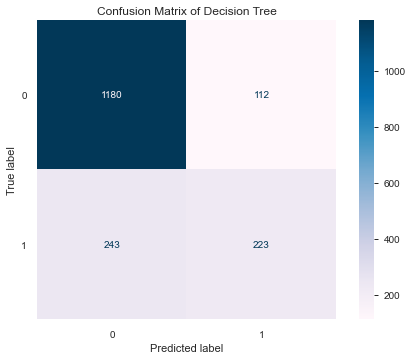

In [48]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg_cv, X_test, y_test, cmap = "PuBu")

plt.grid(False)
plt.title("Confusion Matrix of Decision Tree")

plt.show()

In [49]:
logreg_pre =  precision_score(y_test, y_pred)

logreg_rc = recall_score(y_test, y_pred)

logreg_f1 = f1_score(y_test, y_pred)

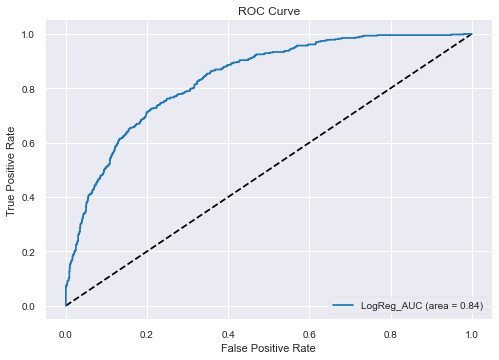

In [50]:
# Import necessary modules
from sklearn.metrics import roc_curve
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)
preds = y_pred_prob[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='LogReg_AUC (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
logreg_auc = roc_auc_score(y_test, preds)

#### k-Nearest Neighbors

In [51]:
from sklearn.pipeline import Pipeline

steps = [('scaler', StandardScaler()),(('knn', KNeighborsClassifier()))]
 
# initiate pipeline
pipeline = Pipeline(steps)

# Setup the hyperparameter grid
parameters = {'knn__n_neighbors': np.arange(1, 40)} 

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=22) 

knn_cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit it to the data
knn_cv.fit(X_train, y_train) 

y_pred = knn_cv.predict(X_test)

knn_cv_best_score = knn_cv.best_score_

print("Tuned Logistic Regression Parameters: {}".format(knn_cv.best_params_)) 
print("Test-set score: {:.3f}".format(knn_cv.score(X_test, y_test)))
print("Best score is {:.3f}".format(knn_cv_best_score))
#print(classification_report(y_test, y_pred))

Tuned Logistic Regression Parameters: {'knn__n_neighbors': 21}
Test-set score: 0.786
Best score is 0.786


I also use pipline to scale the data and then fit it to the model and apply GridSearchCV to find the best n_neighbors. The model perfroms good almost as high as the Logistic Regression, and it has lower false negative than logistic model. 

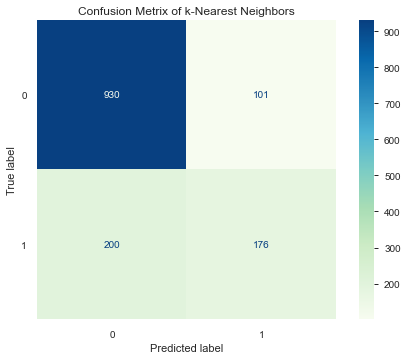

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_cv, X_test, y_test, cmap = "GnBu")

plt.grid(False)
plt.title('Confusion Metrix of k-Nearest Neighbors')
plt.show()

In [53]:
knn_pre =  precision_score(y_test, y_pred)

knn_rc = recall_score(y_test, y_pred)

knn_f1 = f1_score(y_test, y_pred)

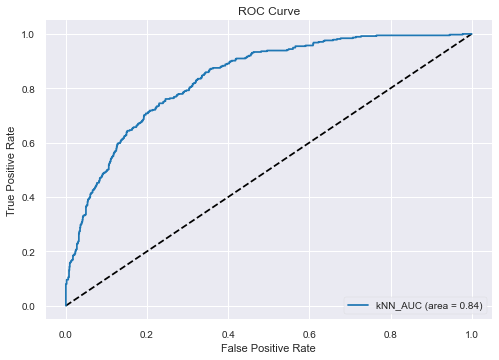

In [54]:
# Import necessary modules
from sklearn.metrics import roc_curve
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)
preds = y_pred_prob[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='kNN_AUC (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
knn_auc = roc_auc_score(y_test, preds)

### RandomizedSearchCV
#### Random Forest

For the Random Forest and Decision Tree, I did not use pipeline as the these two model are independent of feature scale because a node of a tree partitions your data into 2 sets by comparing a feature (which splits dataset best) to a threshold value. There's no regularization for the threshold (because one should keep height of the tree small), so it's not affected by different scales.

That being said, Random Forest and Decision Tree doesn't require scaling because they don't  affect at all if there are any changes to the inputs or features.

In [55]:
# Import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Create the hyperparameter grid
param_dist = {"max_depth": [5, None],
              "max_features": randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Instantiate the classifier
clf = RandomForestClassifier()

# Call RandomizedSearchCV
clf_cv = RandomizedSearchCV(clf, param_dist, cv=5)

# Fit the model
clf_cv.fit(X_train, y_train)

y_pred = clf_cv.predict(X_test)

clf_best_score = clf_cv.best_score_

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(clf_cv.best_params_))
print("Best score is: {:3f}".format(clf_best_score))

Tuned Random Forest Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 4}
Best score is: 0.795200


##### Visualizing feature importances

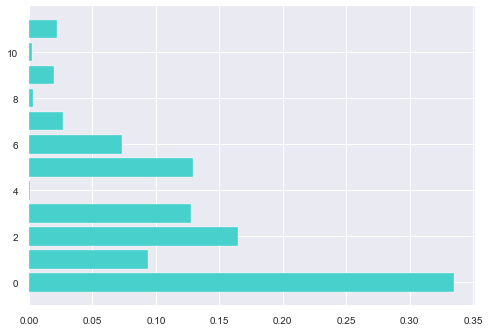

In [56]:
# Calculate feature importances
importances = clf_cv.best_estimator_.feature_importances_

# Create plot
plt.barh(range(X.shape[1]), importances, color='mediumturquoise')

plt.show()

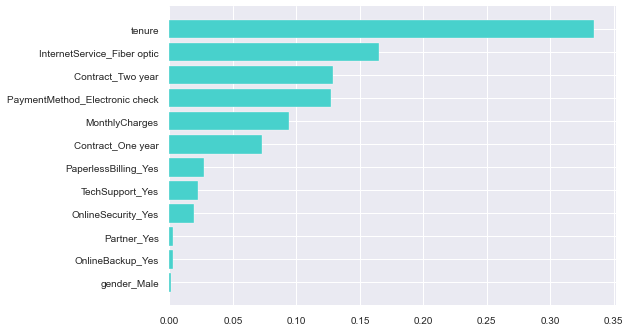

In [57]:
X = telco_df.drop('Churn', axis=1)

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Clear current plot
plt.clf()

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels, color='mediumturquoise')
plt.show()

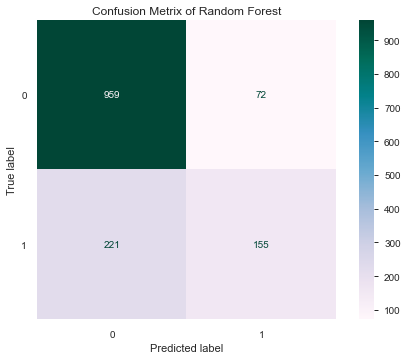

In [58]:
plot_confusion_matrix(clf_cv, X_test, y_test, cmap = "PuBuGn")

plt.grid(False)
plt.title('Confusion Metrix of Random Forest')
plt.show()

After tuning the hyperparameter of Random Forest with pipeline and GridSearchCv, the model improves its accuracy score a lot, and decreases the number of False Positive from 108 to only 60, which is really good as the number of customers that are not churn, but classified as Churn are low. 

In [59]:
clf_pre =  precision_score(y_test, y_pred)

clf_rc = recall_score(y_test, y_pred)

clf_f1 = f1_score(y_test, y_pred)

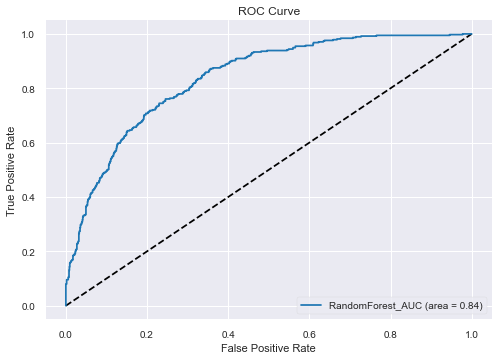

In [60]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)
preds = y_pred_prob[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='RandomForest_AUC (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
clf_auc = roc_auc_score(y_test, preds)

#### Decision Tree

In [61]:
from sklearn.model_selection import RandomizedSearchCV

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [5, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

y_pred = tree_cv.predict(X_test)

tree_best_score = tree_cv.best_score_

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is: {:3f}".format(tree_best_score))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 3}
Best score is: 0.785778


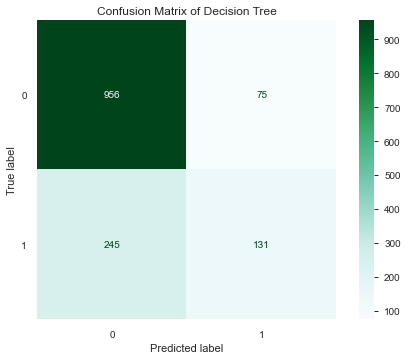

In [62]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree_cv, X_test, y_test, cmap = "BuGn")

plt.grid(False)
plt.title("Confusion Matrix of Decision Tree")

plt.show()

The Decision Tree improves quite a lot from its base model with an accuracy of almost 79%, and it is notable that it has lower False positive than any other models, but higher false negative than any models.

In [63]:
tree_pre =  precision_score(y_test, y_pred)

tree_rc = recall_score(y_test, y_pred)

tree_f1 = f1_score(y_test, y_pred)

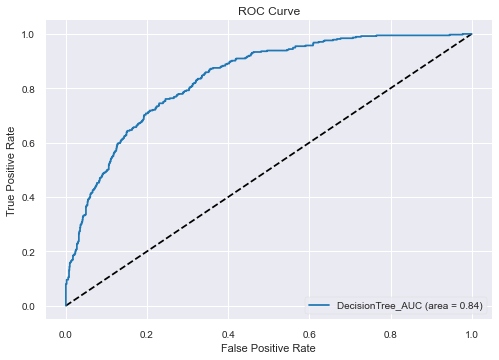

In [64]:
# Import necessary modules
from sklearn.metrics import roc_curve
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)
preds = y_pred_prob[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='DecisionTree_AUC (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print the AUC
tree_auc = roc_auc_score(y_test, preds)

# Model Metrics
## Accuracy Score (Before VS After Tuning)

In [65]:
# Compare servaral models according to their accuracies
model_comparision = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Random Forest', 'Decision Tree', 'k-Nearest Neighbors'],
    'Accuracy Score' : [logreg_accuracy, clf_accuracy, mytree_accuracy, knn_accuracy],
    'Score After Tuning' : [logreg_best_score, clf_best_score, tree_best_score, 
                            knn_cv_best_score]
})

Model_Comparision = model_comparision.sort_values(by='Accuracy Score', ascending=False)
Model_Comparision = Model_Comparision.set_index("Model")
Model_Comparision.reset_index()

,Model,Accuracy Score,Score After Tuning
0,Logistic Regression,0.795,0.796548
1,Random Forest,0.782,0.795200
2,k-Nearest Neighbors,0.775,0.786489
3,Decision Tree,0.730,0.785778


With default parameters and after tuning hyperparameter, Logistic Regression is still the best model according to the accuracy score, but we also need to compare its False Negative using the Recall in the confusion metrix to see which model best fit our interest.

## Compare Confusion Metrix
1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest
4. Decision Tree

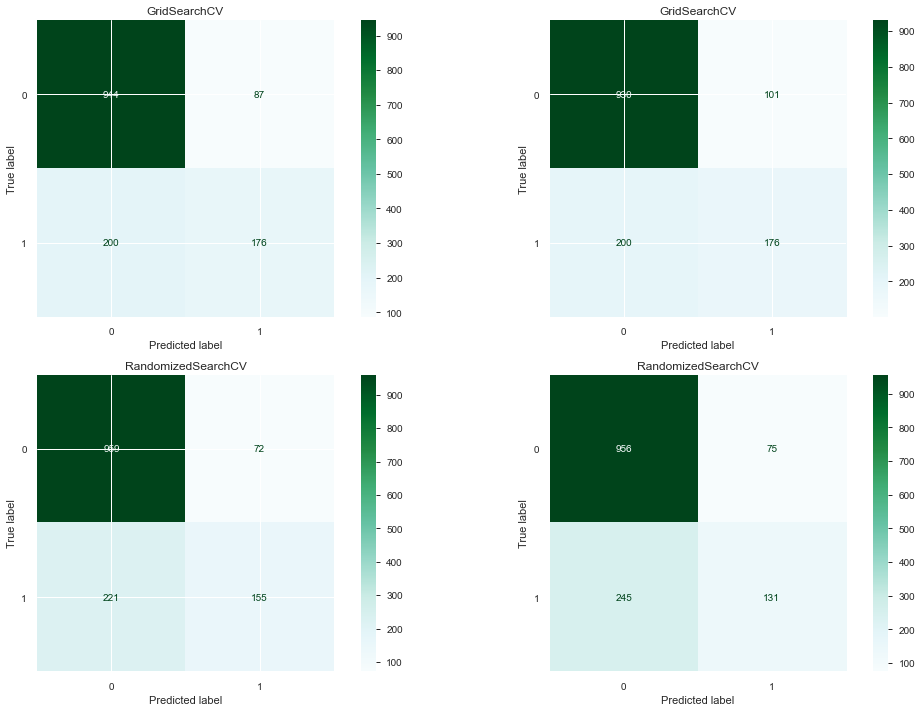

In [66]:
classifiers = [logreg_cv,
               knn_cv, 
               clf_cv,
               tree_cv,
               ]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='BuGn'
                          )
    ax.title.set_text(type(cls).__name__)

plt.grid(False)
plt.tight_layout()  
plt.show()

In [67]:
# Compare servaral models according to their accuracies
score_comparision = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Random Forest', 'Decision Tree', 'k-Nearest Neighbors'],
    'Recall' : [logreg_rc, clf_rc, tree_rc, knn_rc],
    'Precision' : [logreg_pre, clf_pre, tree_pre, knn_pre],
    'F1 Score' : [logreg_f1, clf_rc, tree_rc, knn_rc],
    'Accuracy Score' : [logreg_best_score, clf_best_score, tree_best_score, 
                            knn_cv_best_score],
    'AUC' : [logreg_auc, clf_auc, tree_auc, knn_auc]
})

Score_Comparision = score_comparision.sort_values(by='Recall', ascending=False)
Score_Comparision = Score_Comparision.set_index("Model")
Score_Comparision.reset_index()

,Model,Recall,Precision,F1 Score,Accuracy Score,AUC
0,Logistic Regression,0.478541,0.665672,0.556804,0.796548,0.837367
1,k-Nearest Neighbors,0.468085,0.635379,0.468085,0.786489,0.837965
2,Random Forest,0.412234,0.682819,0.412234,0.795200,0.837965
3,Decision Tree,0.348404,0.635922,0.348404,0.785778,0.837965


# Conclusion
Summarize of the Findings : 
- The best model that is good at predicting customer churn is Logistic Regression. As we focus on retaining the customers, we want a model that has high recall. When the model has low False Negative, it means that the number of customers that churn, but are classified as not churn is low.
- Logistic Regression also has high accuracy score compare to the rest even for its baseline model. This model is easy to understand and interpret. 
- The Area Under Curve (AUC) are around 84%, which meaning all the models predict the positive class very well.
- The Top 5 features that influence the Churn Modeling are tenure, InternetServie_Fiber optic, Contract_Two year, PaymentMethod_Electronic Check, and MonthlyCharges.


